# <span style='font-family:"Times New Roman"'>**US ACCIDENTS 2016 - 2021**

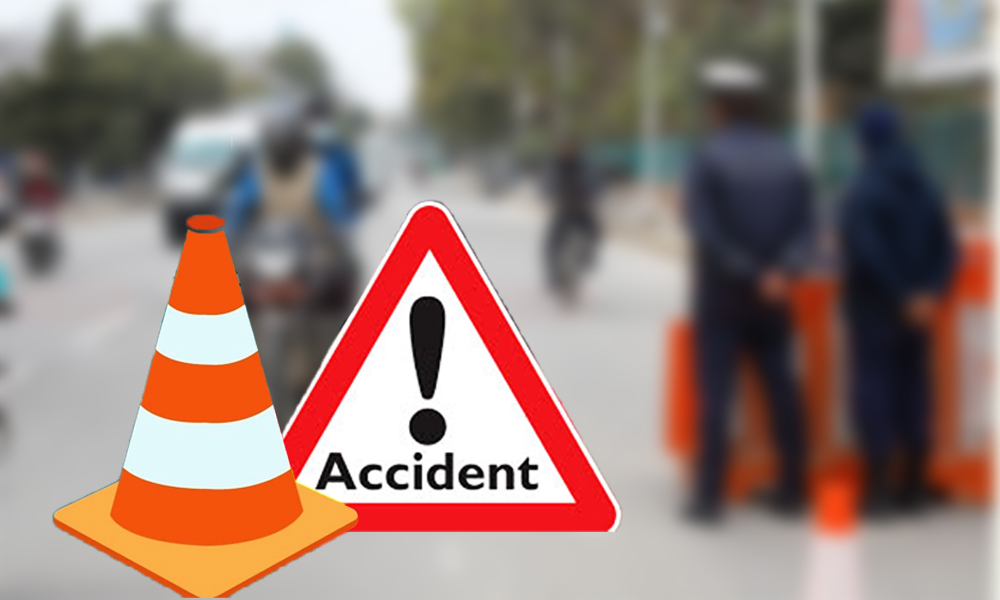

---
<span style="font-family:Times New Roman; font-size:1.2em;">**TABLE OF CONTENTS**
* [Introduction](#introduction)
* [Data Preparation and Cleaning](#preparation)
* [Data Analysis](#analysis)
    * [Location Analysis](#location)
        * [States](#states)
        * [City](#city)
        * [County](#county)
        * [Address](#address)
    * [Time Analysis](#time)
    * [Roads Analysis](#roads)
        * [Severity](#severity)
        * [Others](#others)
    * [Weather Analysis](#weather)
* [Conclusion](#conclusion)
    * [Insights](#insights)
    * [My Take](#mytake) </span>

---
<p style = "font-family:Times New Roman; font-size:1.2em;"> This is a nationwide data analysis of accidents in 49 states from February 2016 to December 2021, derived from a Kaggle dataset. The dataset contains 2.8 million accident records. The purpose of this analysis is to analyze and visualize the data in the dataset. I'll also share my thoughts on the visuals. This analysis looks at the accidents in terms of location, time, road conditions, and weather. The information provided here can be used to help prevent accidents as well as understand how and when to mitigate them. </p>

<a id='preparation'></a>
***
## <span style='font-family:"Times New Roman"'>**DATA PREPARATION AND CLEANING** 

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Import libraries: Pandas | Numpy | Matplotlib | Seaborn | Folium <br>
    Set grid style to 'darkgrid' background </span>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns
import folium

sns.set_style('darkgrid')

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Load the dataset to pandas dataframe

In [2]:
us_accidents_df = pd.read_csv(r"C:\Users\RonaldOnyango\Desktop\Misc\US_Accidents_Dec21_updated.csv")

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> View information about the dataset, including: Top 5 and bottom five rows, columns, and data types

In [3]:
us_accidents_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
us_accidents_df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
us_accidents_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [6]:
us_accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
us_accidents_df.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.089207,0.114063,0.089209,0.114064,0.092140,-0.000689,-0.045335,-0.097459,0.037802,...,0.008141,0.045928,-0.002359,-0.001747,-0.000773,-0.018017,-0.002536,-0.003009,-0.012798,NaN
Start_Lat,0.089207,1.000000,-0.154965,0.999995,-0.154962,0.071588,0.101281,-0.475065,-0.505567,0.005876,...,0.007851,0.043628,-0.017348,0.003184,-0.003366,-0.107697,0.010817,-0.003164,-0.058208,NaN
Start_Lng,0.114063,-0.154965,1.000000,-0.154956,0.999999,0.039861,-0.170566,0.032159,0.010849,0.170909,...,0.018110,-0.017202,0.006220,-0.015450,0.000450,0.038533,-0.040265,-0.007750,0.059568,NaN
End_Lat,0.089209,0.999995,-0.154956,1.000000,-0.154953,0.071593,0.101270,-0.475058,-0.505561,0.005869,...,0.007840,0.043621,-0.017347,0.003184,-0.003366,-0.107696,0.010827,-0.003163,-0.058210,NaN
End_Lng,0.114064,-0.154962,0.999999,-0.154953,1.000000,0.039830,-0.170563,0.032163,0.010852,0.170904,...,0.018110,-0.017199,0.006220,-0.015449,0.000450,0.038533,-0.040264,-0.007750,0.059566,NaN
Distance(mi),0.092140,0.071588,0.039861,0.071593,0.039830,1.000000,0.067331,-0.051212,-0.060094,0.026860,...,-0.006655,0.022442,-0.010184,-0.021462,-0.002491,-0.052826,-0.027108,-0.007322,-0.105722,NaN
Number,-0.000689,0.101281,-0.170566,0.101270,-0.170563,0.067331,1.000000,-0.051146,-0.049400,0.015825,...,-0.003792,-0.010801,-0.005052,-0.013668,-0.001360,-0.028485,-0.003688,-0.005075,-0.058870,NaN
Temperature(F),-0.045335,-0.475065,0.032159,-0.475058,0.032163,-0.051212,-0.051146,1.000000,0.993857,-0.366527,...,-0.005524,-0.020358,0.011610,0.003108,0.002122,0.061248,0.000021,0.005672,0.047657,NaN
Wind_Chill(F),-0.097459,-0.505567,0.010849,-0.505561,0.010852,-0.060094,-0.049400,0.993857,1.000000,-0.346028,...,-0.007584,-0.048784,0.012066,0.005062,0.002466,0.069379,0.005424,0.007140,0.048321,NaN
Humidity(%),0.037802,0.005876,0.170909,0.005869,0.170904,0.026860,0.015825,-0.366527,-0.346028,1.000000,...,0.000063,0.006394,-0.007099,-0.000309,0.000904,-0.000095,-0.015631,-0.005727,-0.034133,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

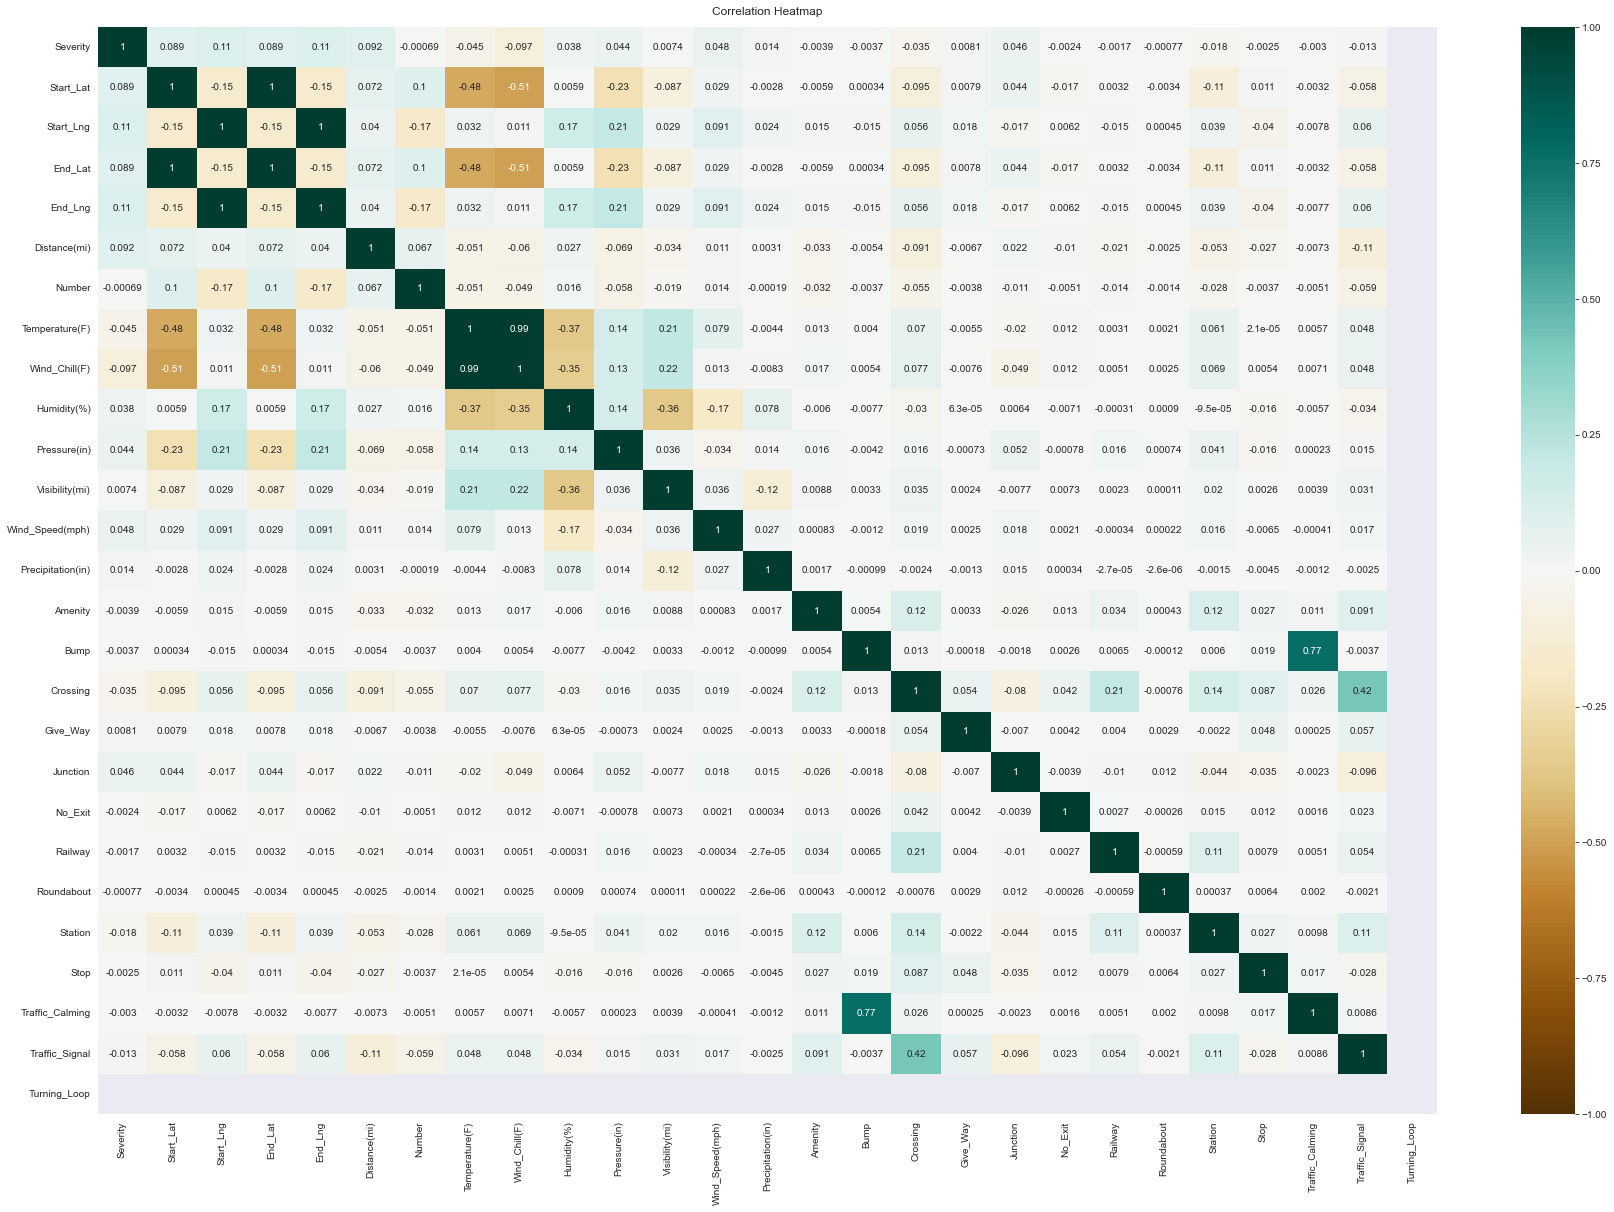

In [8]:
plt.figure(figsize=(30,20))
heatmap = sns.heatmap(us_accidents_df.corr(), vmin=-1, vmax= 1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Find the correlation between different columns and plot a heatmap. Start latitude and end longitude have a high correlation. Traffic calming and Bump also have a high correlation of 0.77

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Convert the Start Time and End Time columns to datetime data type.

In [9]:
us_accidents_df['Start_Time'] = pd.to_datetime(us_accidents_df['Start_Time'])
us_accidents_df['End_Time'] = pd.to_datetime(us_accidents_df['End_Time'])
us_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Find missing values, and calculate the percentages

In [10]:
missing_percentages = us_accidents_df.isna().sum().sort_values(ascending=False) / len(us_accidents_df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Plot missing values to view which column has the most null values

<AxesSubplot:>

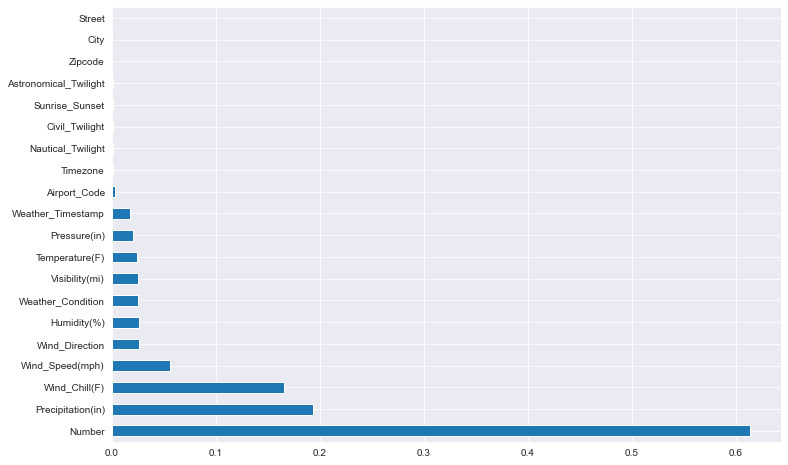

In [11]:
plt.figure(figsize=(12,8))
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [12]:
us_accidents_df['Number'].value_counts()

1.0        10662
2.0         8747
101.0       6706
100.0       6187
198.0       2617
           ...  
42163.0        1
77683.0        1
36887.0        1
45105.0        1
68630.0        1
Name: Number, Length: 46402, dtype: int64

<a id='analysis'></a>
***
## <span style='font-family:"Times New Roman"'>**ANALYSIS**   

<a id='location'></a>
### <span style='font-family:"Times New Roman"'>**LOCATION ANALYSIS**

<a id='states'></a>
#### <span style = "font-family:Times New roman; font-size:1.2em;"> **States**

In [13]:
us_accidents_df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

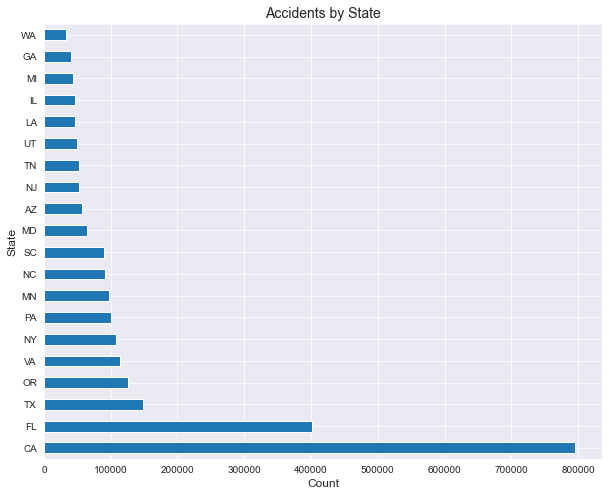

In [14]:
accidents_by_state = us_accidents_df.State.value_counts()

top20_accidents_by_state = accidents_by_state[:20]
plt.figure(figsize=(10,8))
top20_accidents_by_state.plot(kind = 'barh')
plt.xlabel("Count", fontsize = 12)
plt.ylabel("State", fontsize = 12)
plt.xticks(rotation=0)
# plt.xlim(0, )
plt.title("Accidents by State", fontsize = 14);

In [15]:
top20_accidents_by_state * 100 / accidents_by_state.sum()

CA    27.970908
FL    14.106846
TX     5.237929
OR     4.440275
VA     3.990206
NY     3.797399
PA     3.513637
MN     3.415582
NC     3.210932
SC     3.135511
MD     2.287423
AZ     1.985842
NJ     1.859249
TN     1.849092
UT     1.728896
LA     1.659976
IL     1.655513
MI     1.540869
GA     1.408829
WA     1.144116
Name: State, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> The states of Carlifornia and Florida have the highest frequecny of accidents, accounting for 28.0% and 14.1% of the total respectively. Texas, the largest state does not have the highest percentage of accidents as I would have expected.

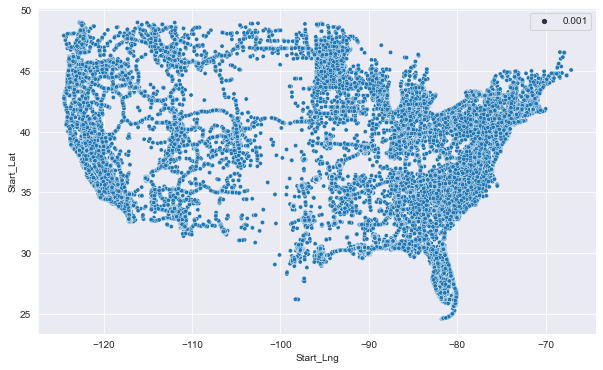

In [16]:
plt.figure(figsize=(10,6))
accidents_map = us_accidents_df.sample(int(0.1*len(us_accidents_df)))

sns.scatterplot(x=accidents_map.Start_Lng, y=accidents_map.Start_Lat, size=0.001);

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> The density of accidents is higher in the East Coast than the West Coast. The States in the Central region from the map have lower accident counts

In [17]:
lat, lng = us_accidents_df.Start_Lat[0], us_accidents_df.Start_Lng[0]
lat, lng

(40.10891, -83.09286)

In [18]:
sample_df = us_accidents_df.sample(int(0.1*len(us_accidents_df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [19]:
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)

<a id='city'></a>
#### <span style = "font-family:Times New roman; font-size:1.1em;"> **City**

In [20]:
accidents_by_city = us_accidents_df.City.value_counts()
accidents_by_city[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

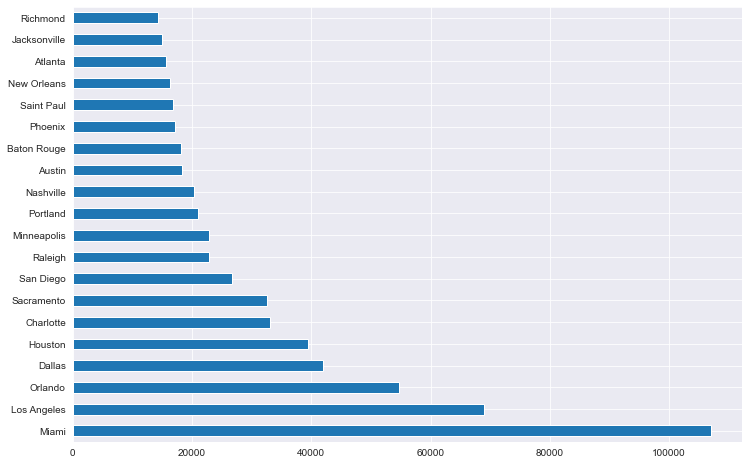

In [21]:
plt.figure(figsize=(12,8))
accidents_by_city[:20].plot(kind='barh')

In [22]:
accidents_by_city[:20] * 100 / accidents_by_city.sum()

Miami           3.759518
Los Angeles     2.423586
Orlando         1.922217
Dallas          1.475430
Houston         1.386473
Charlotte       1.165188
Sacramento      1.144346
San Diego       0.935855
Raleigh         0.802754
Minneapolis     0.800224
Portland        0.736116
Nashville       0.712321
Austin          0.643223
Baton Rouge     0.639040
Phoenix         0.602522
Saint Paul      0.592892
New Orleans     0.571171
Atlanta         0.549064
Jacksonville    0.526043
Richmond        0.504322
Name: City, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Miami and Los Angeles have the highest percentage of accidents in the US, accounting for 3.8% and 2.4% of the total accidents respectively.

In [23]:
lowest_accidents_by_city = accidents_by_city[accidents_by_city == 1].value_counts()
lowest_accidents_by_city

1    1110
Name: City, dtype: int64

In [24]:
 accidents_by_city.value_counts()

1       1110
2        819
3        610
4        490
5        370
        ... 
1129       1
1128       1
1124       1
1120       1
691        1
Name: City, Length: 1224, dtype: int64

In [25]:
us_accidents_df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [26]:
'New York' in us_accidents_df.City.unique()

True

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;">

Check whether New York is captured in the data. New York is one of the most populated cities in the world, but does not appear in the top 20 cities with high accident counts. <br>
Find cities with accidents equal to or greater than 1000 and assign the variable high_accident_cities, and cities with accidents less than 1000 and assign the variable low_accident_cities. 4% of the cities have accidents greater than or equal to 1000 while 96% have accidents less than 1000.
Only 1110 cities out of the total had only 1 accident in the reported period

In [27]:
high_accident_cities =accidents_by_city[accidents_by_city >= 1000]
low_accident_cities = accidents_by_city[accidents_by_city < 1000]

In [28]:
len(high_accident_cities) * 100 / len(accidents_by_city)

4.246211796935194

In [29]:
len(low_accident_cities) * 100 / len(accidents_by_city)

95.7537882030648

C:\Users\RonaldOnyango\AppData\Local\Temp\ipykernel_81620\2300038171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities, kde=True,)


<AxesSubplot:xlabel='City', ylabel='Density'>

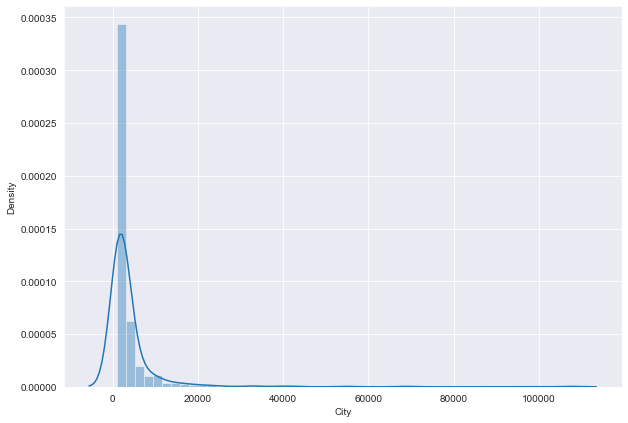

In [30]:
plt.figure(figsize=(10,7))

sns.distplot(high_accident_cities, kde=True,)

C:\Users\RonaldOnyango\AppData\Local\Temp\ipykernel_81620\469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<AxesSubplot:xlabel='City', ylabel='Density'>

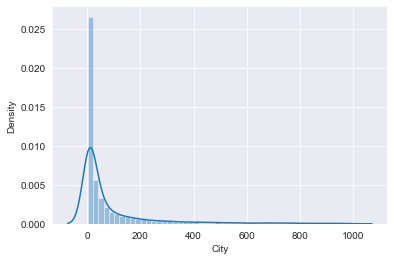

In [31]:
sns.distplot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

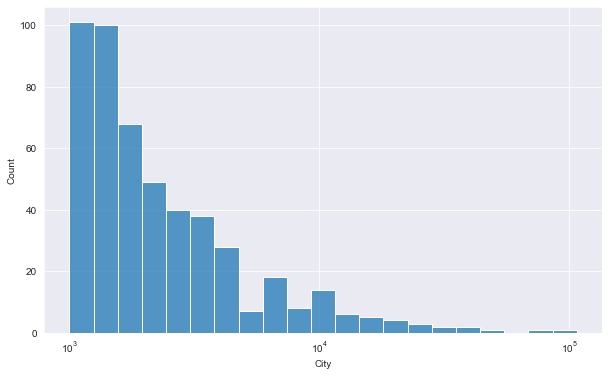

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(high_accident_cities, log_scale=True)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Number of frequency of accidents decreases exponentially for cities with high accident rates.

Text(0.5, 1.0, 'Low Accident Cities')

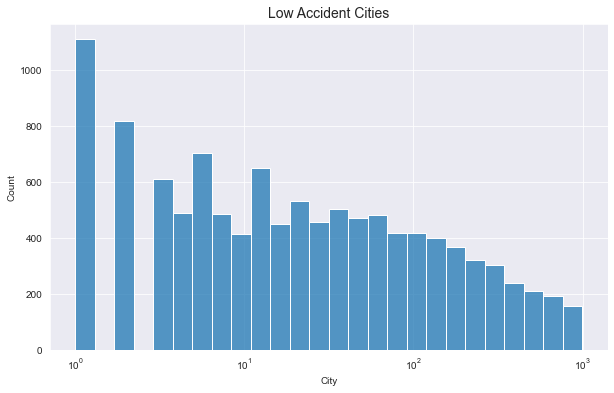

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(low_accident_cities, log_scale=True)
plt.title('Low Accident Cities', fontsize = 14)

<a id='county'></a>
#### <span style = "font-family:Times New roman; font-size:1.2em;"> **County**

Text(0, 0.5, 'County')

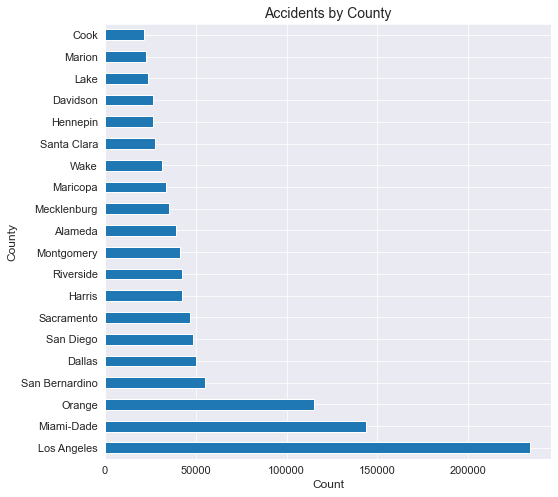

In [34]:
accidents_by_county = us_accidents_df.County.value_counts()
accidents_by_county[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by County', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('County', fontsize=12)

In [35]:
accidents_by_county[:20]  * 100 / accidents_by_county.sum()

Los Angeles       8.228255
Miami-Dade        5.058759
Orange            4.038776
San Bernardino    1.933616
Dallas            1.759015
San Diego         1.699831
Sacramento        1.641560
Harris            1.495743
Riverside         1.482282
Montgomery        1.457681
Alameda           1.370556
Mecklenburg       1.236793
Maricopa          1.178734
Wake              1.112766
Santa Clara       0.963505
Hennepin          0.933455
Davidson          0.922877
Lake              0.828863
Marion            0.788552
Cook              0.749822
Name: County, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Los Angels and Miami-Dade have significantly high accident acounts. Los Angeles county accounts for 8.2% of the total accidents and Miami-Dade accounts for 5.1% of the total accidents in the counties.

<a id='address'></a>
#### <span style = "font-family:Times New roman; font-size:1.2em;"> **Address**

Text(0, 0.5, 'Zipcode')

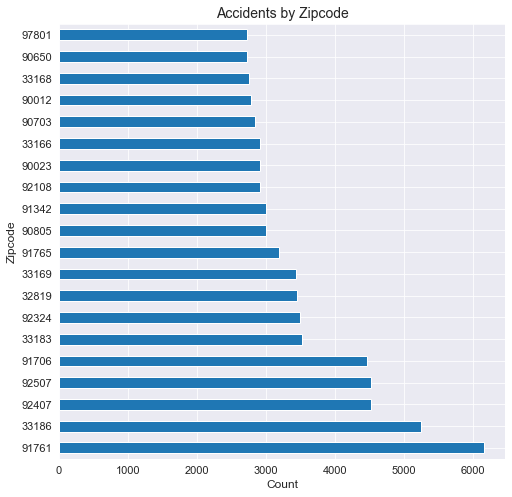

In [36]:
accidents_by_zipcode = us_accidents_df.Zipcode.value_counts()
accidents_by_zipcode[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by Zipcode', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Zipcode', fontsize=12)

In [37]:
accidents_by_zipcode[:20] * 100 / accidents_by_zipcode.sum()

91761    0.216665
33186    0.184527
92407    0.159211
92507    0.159176
91706    0.157207
33183    0.123698
92324    0.122749
32819    0.121483
33169    0.120920
91765    0.112130
90805    0.105555
91342    0.105449
92108    0.102707
90023    0.102707
33166    0.102496
90703    0.099999
90012    0.097995
33168    0.096940
90650    0.095850
97801    0.095815
Name: Zipcode, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Zipcodes 91761 and 33186 have the highest percentages of 022% and 0.18% respectively

Text(0, 0.5, 'Street')

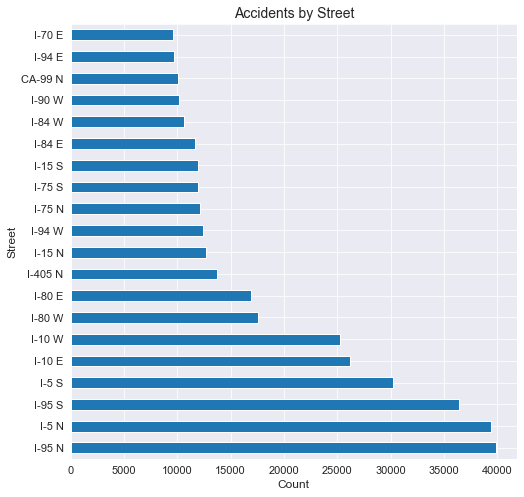

In [38]:
accidents_by_street = us_accidents_df.Street.value_counts()
accidents_by_street[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by Street', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Street', fontsize=12)

In [39]:
accidents_by_street[:20] * 100 / accidents_by_street.sum()

I-95 N     1.400641
I-5 N      1.384791
I-95 S     1.280163
I-5 S      1.062404
I-10 E     0.919539
I-10 W     0.889103
I-80 W     0.616622
I-80 E     0.593005
I-405 N    0.481770
I-15 N     0.445465
I-94 W     0.435027
I-75 N     0.424765
I-75 S     0.420407
I-15 S     0.418966
I-84 E     0.410390
I-84 W     0.374577
I-90 W     0.357216
CA-99 N    0.352893
I-94 E     0.339713
I-70 E     0.337886
Name: Street, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Streets I-95 S, I-5 N and I-95 N have the highest frequency of accidents in relation to the other streets, of 1.3%, 1.4% and 1.4% respectively

<a id='time'></a>

---
### <span style='font-family:"Times New Roman"'>**TIME ANALYSIS**

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> I will look at accidents by timezone, time of day, week day, month and year. This will give an insight on accidents by timezones, what time of the day most accidents occur, what day of the week, what month and in which year did most accidents occur. This can be used to predict and prevent accidents.

Text(0, 0.5, 'Timezone')

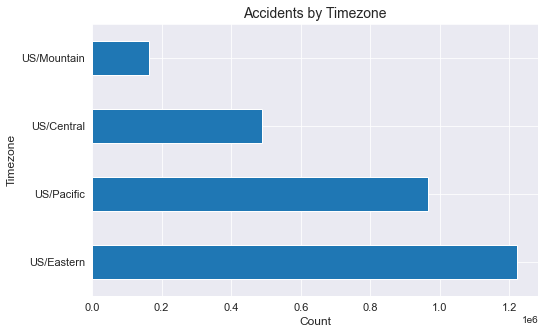

In [40]:
accidents_by_timezone = us_accidents_df.Timezone.value_counts()
accidents_by_timezone.plot(kind='barh', figsize=(8,5), fontsize =11)
plt.title('Accidents by Timezone', fontsize = 14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Timezone', fontsize=12)

In [41]:
accidents_by_timezone * 100 / accidents_by_timezone.sum()

US/Eastern     43.000116
US/Pacific     34.032438
US/Central     17.175209
US/Mountain     5.792237
Name: Timezone, dtype: float64

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Eastern and Pacific Timezones have the highest accidents percentage, 43.0% and 34.0% respectively, in the US. Mountain timezone has the lowest percentage of accidents, 5.8% of total accidents.

In [42]:
start_time = us_accidents_df.Start_Time.value_counts()
start_time[:20]

2021-01-26 16:16:13    252
2021-01-26 16:17:33    170
2021-02-16 06:42:43    157
2021-05-03 06:29:42    111
2021-11-21 18:37:51    102
2021-02-16 06:43:35     97
2021-04-26 08:58:47     95
2021-04-14 13:51:30     92
2020-12-16 13:53:25     82
2021-05-03 06:30:28     75
2021-12-07 14:16:30     72
2021-12-14 10:39:00     71
2021-03-22 06:30:42     71
2021-03-15 06:25:17     70
2021-02-10 14:26:11     69
2021-12-16 14:11:00     63
2020-10-12 11:13:30     62
2020-09-30 12:41:30     61
2021-05-03 06:31:30     60
2017-05-15 09:22:55     59
Name: Start_Time, dtype: int64

Text(0.5, 1.0, 'Accidents by Time')

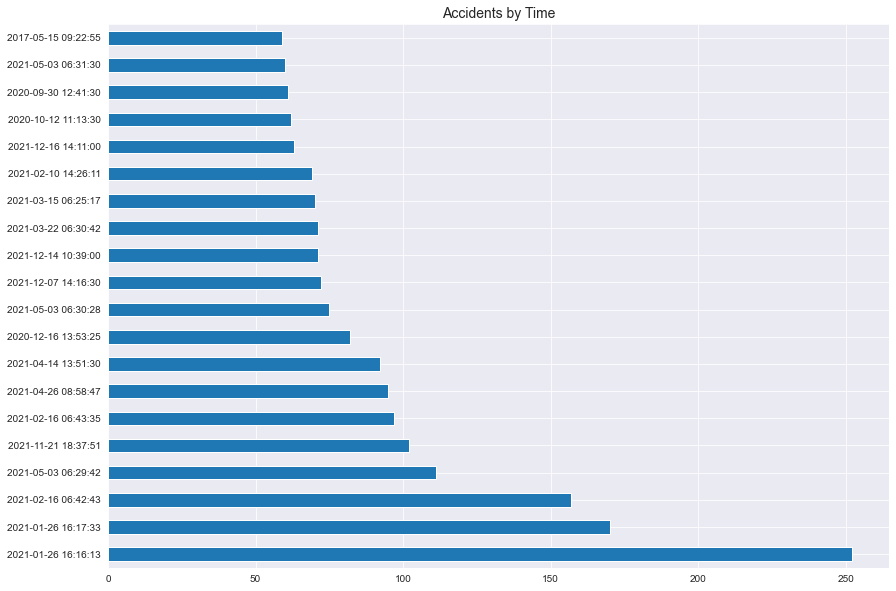

In [43]:
plt.figure(figsize=(14,10))
start_time[:20].plot(kind='barh')
plt.title('Accidents by Time', fontsize = 14)

In [44]:
us_accidents_df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

Text(0, 0.5, 'Count')

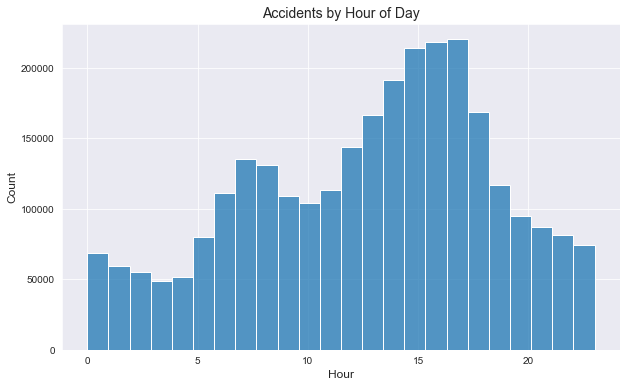

In [45]:
plt.figure(figsize=(10,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.hour, bins=24, kde=False)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Highest percentage of accidents seem to occur between 6am and 9am, and between 11am and 6pm. These seem to be rush hours when people are going to work and coming back from work. Around 1pm could be because people are heading to and from lunch.

Text(0, 0.5, 'Count')

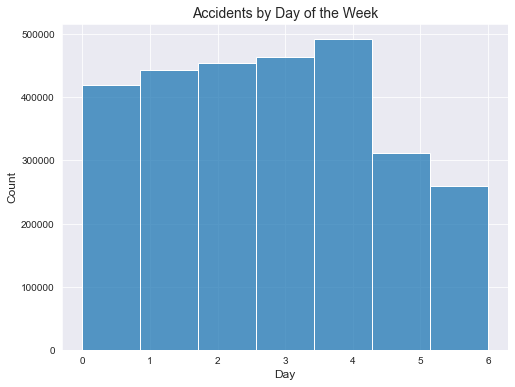

In [46]:
plt.figure(figsize=(8,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.day_of_week, bins=7, kde=False)
plt.title('Accidents by Day of the Week', fontsize = 14)
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Accident acount increases between Day 1 and Day 5 of the week. This could be because of people going to work on week days. On Friday, accidents seems to be the highest, which can be attributed to drunk drivers. 
Saturday and Sunday have fewer accidents, as most people are at home. Sunday is the lowest.

<span style = "font-family:Times New roman; font-size:1.2em;"> **Is the distribution of accidents on weekdays same as on weekends?**

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> I will compare Monday and Sunday

Text(0, 0.5, 'Count')

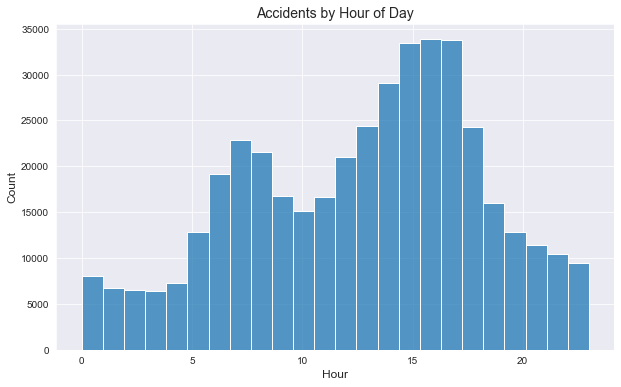

In [47]:
mondays_start_time = us_accidents_df.Start_Time[us_accidents_df.Start_Time .dt.day_of_week == 0]

plt.figure(figsize=(10,6))
sns.histplot(mondays_start_time.dt.hour,bins=24)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

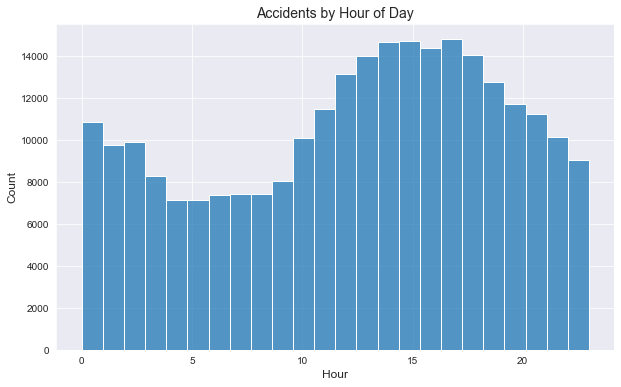

In [48]:
sundays_start_time = us_accidents_df.Start_Time[us_accidents_df.Start_Time .dt.day_of_week == 6]

plt.figure(figsize=(10,6))
sns.histplot(sundays_start_time.dt.hour,bins=24)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> On Sundays, there is a spike between 10am and 3pm.

Text(0, 0.5, 'Count')

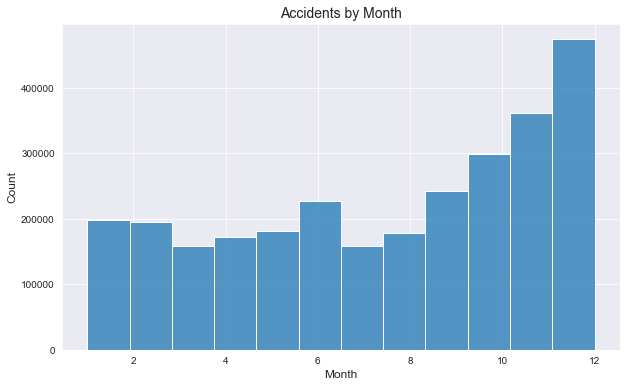

In [49]:
plt.figure(figsize=(10,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.month, bins=12, kde=False)
plt.title('Accidents by Month', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> The percentage of accidents increases exponentially with each month. March seems to have the lowest percentage. There is a huge spike between October and December accidents, with December being the highest. This could be because of the festive season, and winter.

<AxesSubplot:xlabel='count', ylabel='Severity'>

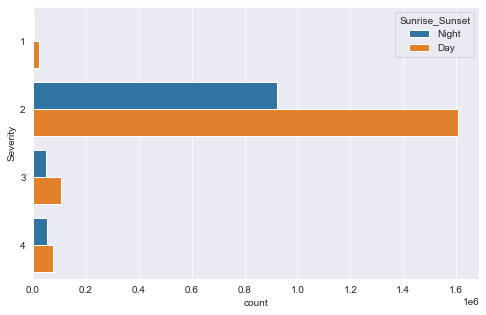

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(y='Severity',data=us_accidents_df,hue='Sunrise_Sunset')

<a id='roads'></a>

---
### <span style='font-family:"Times New Roman"'>**ROADS ANALYSIS**

<Figure size 576x432 with 0 Axes>

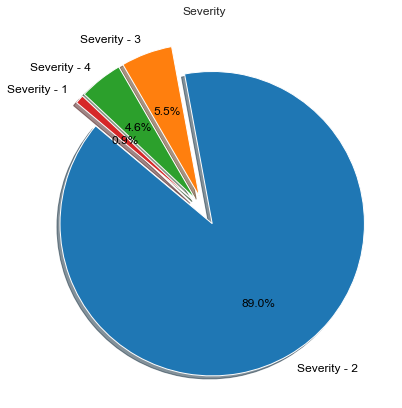

In [50]:
accidents_severity = us_accidents_df.Severity.value_counts()
ax = plt.figure(figsize=(8, 6))

severity_label = ['Severity - 2', "Severity - 3", 'Severity - 4','Severity - 1']

fig = plt.figure(figsize =(10, 7))
plt.pie(accidents_severity, labels = severity_label, autopct='%1.1f%%',startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'}, explode=(0.1,0.1,0.1,0.1), shadow=True)
plt.title(label="Severity",
          loc="center",
          fontstyle='normal')
plt.show()

<a id='severity'></a>

<span style = "font-family:Times New roman; font-size:1.2em;"> **Severity.**
<div class="alert-block alert-info alert">
<span style = "font-family:Times New roman; font-size:1.1em;"> Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay). 89% of the accidents had a moderate level 2 severity on traffic, while 4.6% had a level 4 severity.

In [51]:
accidents_by_side = us_accidents_df.Side.value_counts()
accidents_by_crossing = us_accidents_df.Crossing.value_counts()
accidents_by_bump = us_accidents_df.Bump.value_counts()
accidents_by_giveway = us_accidents_df.Give_Way.value_counts()
accidents_by_junction = us_accidents_df.Junction.value_counts()
accidents_by_no_exit = us_accidents_df.No_Exit.value_counts()
accidents_by_railway = us_accidents_df.Railway.value_counts()
accidents_by_roundabout = us_accidents_df.Roundabout.value_counts()
accidents_by_station = us_accidents_df.Station.value_counts()
accidents_by_stop = us_accidents_df.Stop.value_counts()
accidents_by_traffic_calming = us_accidents_df.Traffic_Calming.value_counts()
accidents_by_traffic_signal = us_accidents_df.Traffic_Signal.value_counts()
accidents_by_turning_loop = us_accidents_df.Turning_Loop.value_counts()

<AxesSubplot:title={'center':'Accidents by  Station'}, ylabel=' '>

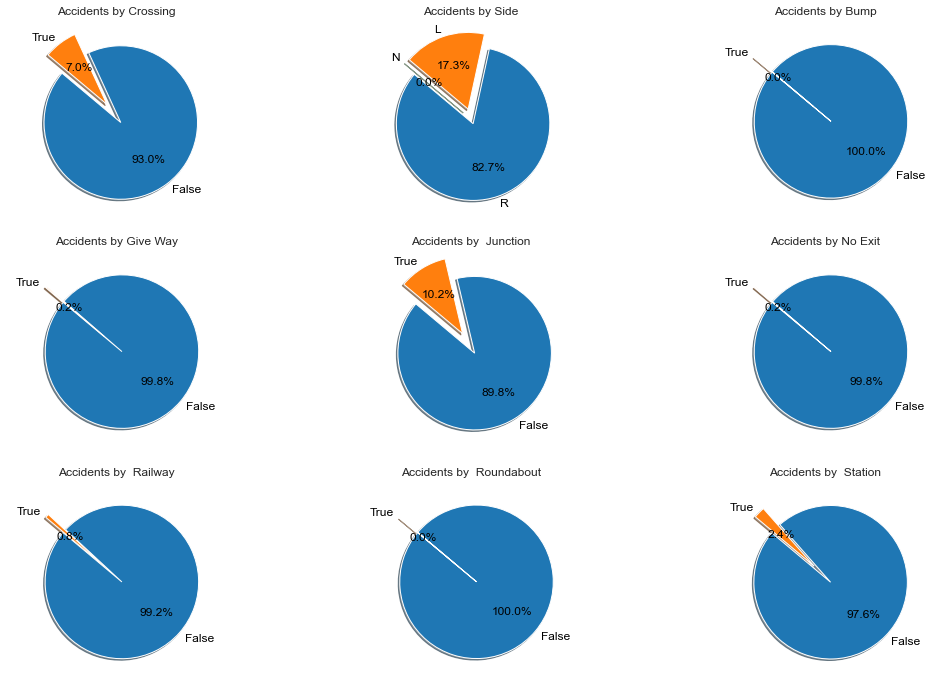

In [52]:
fig, axes = plt.subplots(3 , 3, figsize=(18,12))

accidents_by_crossing.plot(ax = axes[0, 0],  kind='pie', fontsize =12, title = 'Accidents by Crossing', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_side.plot(ax = axes[0, 1],  kind='pie', fontsize =12, title = 'Accidents by Side', ylabel=' ', explode = (0.1,0.1,0.1), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_bump.plot(ax = axes[0, 2],  kind='pie', fontsize =12, title = 'Accidents by Bump', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_giveway.plot(ax = axes[1, 0],  kind='pie', fontsize =12, title = 'Accidents by Give Way', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_junction.plot(ax = axes[1, 1],  kind='pie', fontsize =12, title = 'Accidents by  Junction', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_no_exit.plot(ax = axes[1, 2],  kind='pie', fontsize =12, title = 'Accidents by No Exit', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_railway.plot(ax = axes[2, 0],  kind='pie', fontsize =12, title = 'Accidents by  Railway', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_roundabout.plot(ax = axes[2, 1],  kind='pie', fontsize =12, title = 'Accidents by  Roundabout', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
accidents_by_station.plot(ax = axes[2, 2],  kind='pie', fontsize =12, title = 'Accidents by  Station', ylabel=' ', explode = (0.1,0.2), shadow = True, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})

<AxesSubplot:title={'center':'Accidents by  Turning Loop'}>

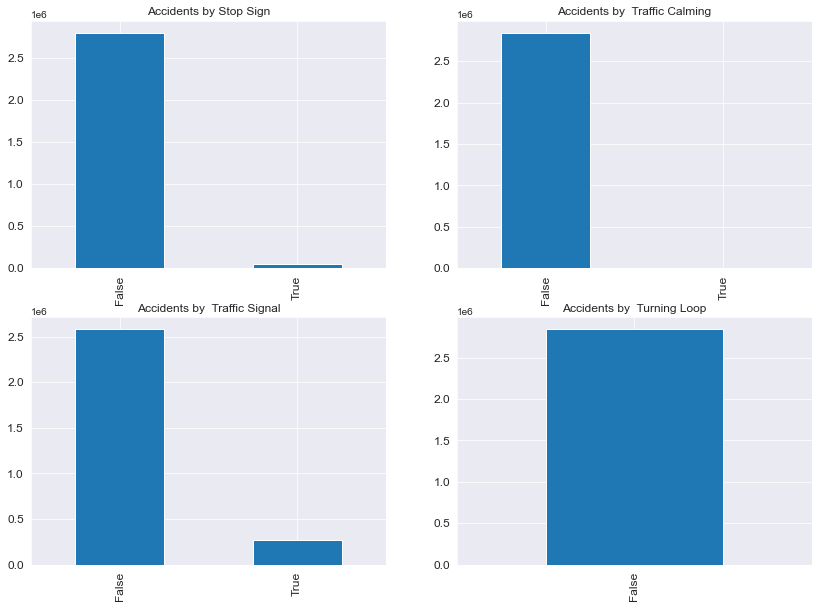

In [53]:
fig, axes = plt.subplots(2 , 2, figsize=(14,10))

accidents_by_stop.plot(ax = axes[0,0],  kind='bar', fontsize =12, title = 'Accidents by Stop Sign', )
accidents_by_traffic_calming.plot(ax = axes[0, 1],  kind='bar', fontsize =12, title = 'Accidents by  Traffic Calming', )
accidents_by_traffic_signal.plot(ax = axes[1,0],  kind='bar', fontsize =12, title = 'Accidents by  Traffic Signal')
plt.xticks(rotation=0)
accidents_by_turning_loop.plot(ax = axes[1, 1],  kind='bar', fontsize =12, title = 'Accidents by  Turning Loop')

<a id='others'></a>
***
<span style='font-family:Times New Roman; font-size:1.1em;'> **Bumps | Crossing | Give Way | Junction | No Exit | Railway | Roundabout | Traffic | Turning Loop**

<div class="alert-block alert-info alert">
<span style='font-family:Times New Roman; font-size:1.1em;'>
In 100% of the accidents, bumps or humps were not present in the location or nearby location. This tells us that bumps / humps play a very key role in accidents prevention in the US, in the areas they are available.<br>
The percentage of accidents is 93% in areas without crossing, while it is 7% in areas with crossing. Having a crossing in a nearby location can help prevent accidents by up to 93%. <br>
Percentage of accidents is high, 100%, in areas without a give-way at a nearby location. This can be something to consider when creating a plan to prevent accidents in high accident prone areas. <br>
Generally, I can say the highest percentage of accidents occur in areas without No Exit, Roundabout, Traffic Calming, Traffic Signal, Station, Stop sign and a Turning Loop. This indicates that accidents can be prevented by strategically placing them in the current accident hotspot areas. <br>
Cars in the US are driven on the right side of the road. The percentage of accidents occurence is higher on the right side than on the left side. This could be due to head on collisions. <br>

In [54]:
us_accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<a id='weather'></a>
***
### <span style='font-family:"Times New Roman"'>**WEATHER ANALYSIS**

<a id='conclusion'></a>
***
## <span style='font-family:"Times New Roman"'>**CONCLUSION**

<a id='insights'></a>

<span style = "font-family:Times New roman; font-size:1.4em;"> **Insights**

<span style = "font-family:Times New Roman; font-size:1.1em;">
    
1. California and Florida have the highest accident rates, accounting for 28.0% and 14.1% of total accidents, respectively. The largest state, Texas, does not have the highest percentage of accidents, as I would have expected.
2. The East Coast has a higher accident density than the West Coast. The states in the map's central region have lower accident rates.
3. Miami and Los Angeles have the highest accident rates in the United States, accounting for 3.8% and 2.4% of total accidents, respectively.
4. 4% of cities have more than or equal to 1000 accidents, while 96% have fewer than 1000. Only 1110 of the total cities had one accident during the reporting period.
5. Accident rates are significantly higher in Los Angeles and Miami-Dade counties. Los Angeles County accounts for 8.2% of total accidents, while Miami-Dade County accounts for 5.1% of total accidents.
6. Eastern and Pacific Time zones have the highest accidents percentage, 43.0% and 34.0% respectively, in the US. The Mountain time zone has the lowest percentage of accidents, accounting for 5.8% of all accidents.
7. The majority of accidents appear to occur between 6 a.m. and 9 a.m., and between 11 a.m. and 6 p.m. These appear to be rush hours for people on their way to and from work. Around 1 p.m., people may be on their way to and from lunch.
7. The majority of accidents appear to occur between 6 a.m. and 9 a.m., and between 11 a.m. and 6 p.m. These appear to be rush hours for people on their way to and from work. Around 1 p.m., people may be on their way to and from lunch.
8. The number of accidents increases between the first and fifth days of the week. This could be due to people going to work during the week. Accidents appear to be at an all-time high on Friday, which can be attributed to drunk drivers. Because most people are at home on Saturday and Sunday, there are fewer accidents. Sunday has the lowest accident rates.
9. The number of accidents increases exponentially month after month. The month of March appears to have the lowest rate. There is a significant increase in accidents between October and December, with December having the highest number. This could be due to the holiday season and winter.
10. On traffic, 89% of the accidents had a moderate level 2 severity, while 4.6% had a level 4 severity.
11. In 100% of the accidents, there were no bumps or humps in the accident location or nearby location. This indicates that bumps / humps play a key role in accident prevention in the United States, where they are available.
12. The percentage of accidents is 93% in areas where there is no crossing and 7% in areas where there is a crossing. Having a crossing in a nearby location can help prevent up to 93% of accidents.
13. The percentage of accidents is high, 100%, in areas without a nearby give-way. This is something to think about when developing a plan to prevent accidents in high-accident areas.
14. In general, I believe that areas lacking a No Exit, Roundabout, Traffic Calming, Traffic Signal, Station, Stop sign, and a Turning Loop have the highest percentage of accidents. This suggests that accidents can be avoided by strategically positioning them in current accident hotspot areas.
15. Cars in the United States are driven on the right side of the road. The percentage of accidents occurring on the right side is higher than on the left side. This could be the result of head-on collisions.

<a id='mytake'></a>

<span style = "font-family:Times New roman; font-size:1.4em;"> **My Takeaway** 

<div class = "alert-block alert-success alert"><span style="font-family:Times New Roman; font-size:1.2em;"> This data provides a wealth of information about accidents in the United States. This can be used to avoid road accidents. Given the various data points in this dataset, it can also be used to create an accident prediction model. Some missing data points that would have provided more insight into accident rates include the population of different locations, the cause of the accident, e.g., whether the driver was drunk, whether the accident was pedestrian-caused or not, faulty vehicles, and so on. This would have enabled me to gain more insights and reach more conclusions. </span> </div>